In [20]:
ASSETS_GROUP = {'asserts': ['yfi', 'alcx', 'farm', 'auto', 'pickle', 'ren', 'badger'], 'cex_platform': ['bnb', 'okb', 'ftt', 'ht', 'leo', 'vgx', 'btmx', 'mdx', 'mx', 'woo'], 'DAO': ['dcr', 'ant', 'dafi'], 'derivative_synthesis': ['hegic', 'snx', 'uma', 'mir', 'lina'], 'dex': ['uni', 'cake', 'sushi', 'zrx', 'bnt', '1inch', 'crv', 'lrc', 'knc', 'bal', 'dodo', 'srm', 'rep', 'swap', 'perp', 'lon', 'any', 'kex'], 'insurance': ['nxm', 'wnxm', 'helmet', 'armor', 'yam'], 'lending': ['aave', 'comp', 'mkr', 'xvs', 'alpha', 'kava', 'mft', 'cream', 'uft', 'cel'], 'NFT': ['chz', 'enj', 'mana', 'flow', 'sand', 'ern', 'alice', 'rari', 'matic', 'waxp', 'tvk', 'cws', 'axs'], 'oracle': ['link', 'band', 'api3', 'trb', 'nest'], 'stablecoin': ['luna', 'rsr', 'ampl', 'esd', 'fxs', 'bank', 'bas', 'bac'], 'public_chain': ['btc', 'eth', 'ada', 'vet', 'miota', 'xtz', 'neo', 'algo', 'hbar', 'stx', 'near', 'icx', 'ont', 'qtum', 'one', 'iost', 'ckb', 'stmx', 'vtho', 'ewt', 'orbs', 'lyxe', 'chr', 'lsk', 'waves', 'zil', 'atom', 'sol', 'AVAX', 'egld', 'qkc', 'xem', 'ftm'], 'storage': ['fil', 'ar', 'storj', 'sc', 'cru'], 'payment': ['cro', 'omg', 'npxs', 'nano', 'sxp', 'utk', 'coti', 'pac', 'tel', 'meta', 'nim', 'xlm'],  'data': ['dent', 'nmr', 'bdp', 'ocean', 'btt', 'grt'], 'dot': ['ksm', 'pols', 'fis', 'reef', 'edg', 'dot', 'ring'], 'privacy': ['xmr', 'dash', 'zec', 'xvg', 'rose', 'torn']}

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def draw_heatmap_from_df(df, assets_group, moving_avg):
    for key, assets in assets_group.items():
        for asset in assets:
            if not asset in df:
                print('%s does not exist in df.' % asset)
                continue

            makey = asset + ' ma' + str(moving_avg) 
            df[makey] = df[asset].rolling(window=moving_avg).mean()

    ## Calculate if each individual coin above ma5, and total # of coins above ma5 in each group (e.g. nft group) 
    for key, assets in assets_group.items():
        col_total_above = key + ' total above ma' + str(moving_avg)
        df[col_total_above] = 0
        for asset in assets:
            if not asset in df:
                print('%s does not exist in df.' % asset)
                continue
            makey = asset + ' ma' + str(moving_avg)
            ma5Comparekey = asset + ' above ma' + str(moving_avg)      
            df[ma5Comparekey] = np.where(df[asset] > df[makey], 1, 0)
            df[col_total_above] += df[ma5Comparekey]

    ## Calculate percentage of coins above ma5 in each group         
    for key, assets in assets_group.items():
        percentage_above = key + ' percentage above ma' + str(moving_avg)
        col_total_above = key + ' total above ma' + str(moving_avg)
        df[percentage_above] = df[col_total_above] / len(assets)

    ## Reorder column for better viewing
    ordered_col = []
    key_col = []
    keys = []
    for key, assets in assets_group.items():
        for asset in assets:
            if not asset in df:
                continue
            makey = asset + ' ma' + str(moving_avg)
            ma5Comparekey = asset + ' above ma' + str(moving_avg)
            ordered_col.append(asset)
            ordered_col.append(makey)
            ordered_col.append(ma5Comparekey)
        col_total_above = key + ' total above ma' + str(moving_avg)
        percentage_above = key + ' percentage above ma' + str(moving_avg)
        ordered_col.append(col_total_above)
        ordered_col.append(percentage_above)
        key_col.append(percentage_above)
        keys.append(key)
        
    df = df[ordered_col] 

    # drop first 4 days, as NaN values for first 4 days if calcualge ma5
    df = df.dropna()

    ##Complete data frame

    model_df = df[key_col]
    model_df.columns = keys

    # model_df.index = model_df.index.strftime("%m/%d/%y")

    model_df = model_df.T

    colormap = sns.diverging_palette(10, 150, n=20) # sns.color_palette("Greens")
    fig, ax = plt.subplots(figsize=(120,10))  
    p1 = sns.heatmap(model_df, cmap=colormap, ax=ax)

auto does not exist in df.
pickle does not exist in df.
vgx does not exist in df.
btmx does not exist in df.
mdx does not exist in df.
mx does not exist in df.
woo does not exist in df.
dafi does not exist in df.
any does not exist in df.
nxm does not exist in df.
helmet does not exist in df.
ern does not exist in df.
bac does not exist in df.
lyxe does not exist in df.
cru does not exist in df.
coti does not exist in df.
nim does not exist in df.
ocean does not exist in df.
btt does not exist in df.
fis does not exist in df.
torn does not exist in df.
auto does not exist in df.
pickle does not exist in df.
vgx does not exist in df.
btmx does not exist in df.
mdx does not exist in df.
mx does not exist in df.
woo does not exist in df.
dafi does not exist in df.
any does not exist in df.
nxm does not exist in df.
helmet does not exist in df.
ern does not exist in df.
bac does not exist in df.
lyxe does not exist in df.
cru does not exist in df.
coti does not exist in df.
nim does not ex

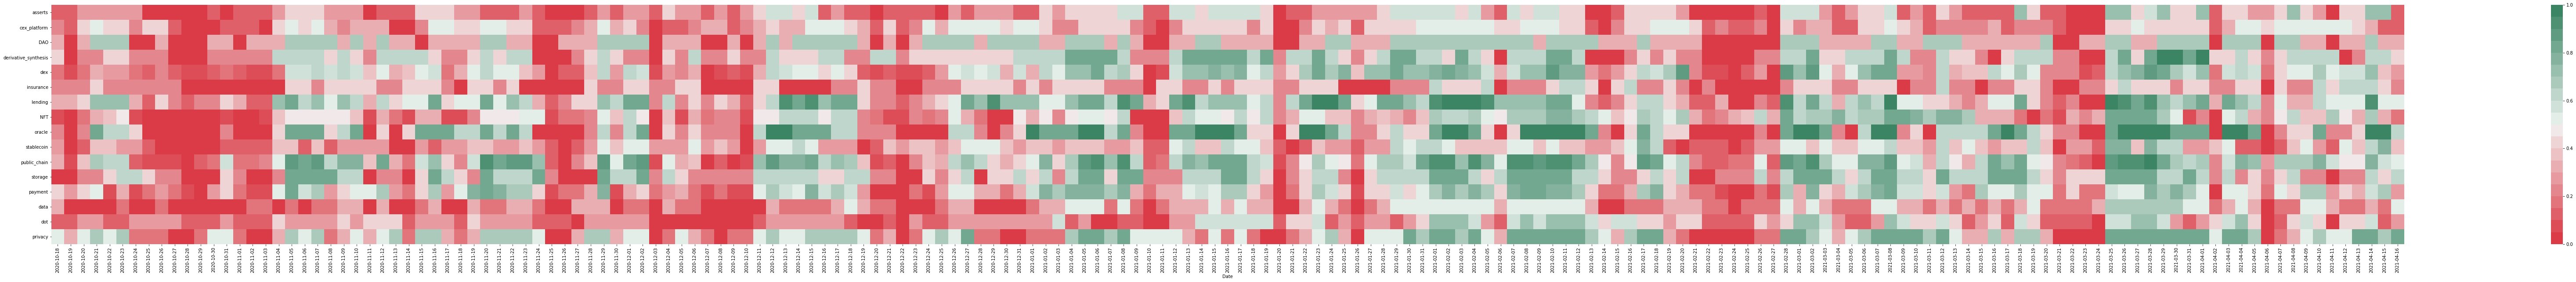

In [27]:
price_history_df = pd.read_pickle('data/price_history.pkl')

df = draw_heatmap_from_df(
    df=price_history_df,
    assets_group=ASSETS_GROUP,
    moving_avg=5)


auto does not exist in df.
pickle does not exist in df.
vgx does not exist in df.
btmx does not exist in df.
mdx does not exist in df.
mx does not exist in df.
woo does not exist in df.
dafi does not exist in df.
any does not exist in df.
nxm does not exist in df.
helmet does not exist in df.
ern does not exist in df.
bac does not exist in df.
lyxe does not exist in df.
cru does not exist in df.
coti does not exist in df.
nim does not exist in df.
ocean does not exist in df.
btt does not exist in df.
fis does not exist in df.
torn does not exist in df.
auto does not exist in df.
pickle does not exist in df.
vgx does not exist in df.
btmx does not exist in df.
mdx does not exist in df.
mx does not exist in df.
woo does not exist in df.
dafi does not exist in df.
any does not exist in df.
nxm does not exist in df.
helmet does not exist in df.
ern does not exist in df.
bac does not exist in df.
lyxe does not exist in df.
cru does not exist in df.
coti does not exist in df.
nim does not ex

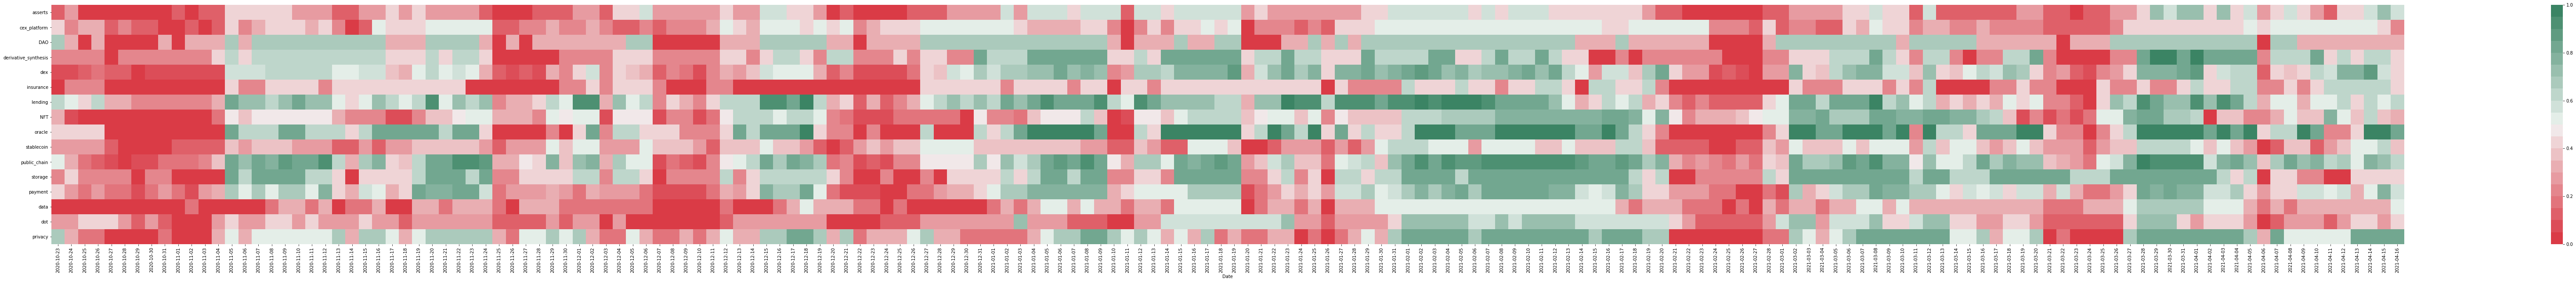

In [28]:
df = draw_heatmap_from_df(
    df=price_history_df,
    assets_group=ASSETS_GROUP,
    moving_avg=10)

auto does not exist in df.
pickle does not exist in df.
vgx does not exist in df.
btmx does not exist in df.
mdx does not exist in df.
mx does not exist in df.
woo does not exist in df.
dafi does not exist in df.
any does not exist in df.
nxm does not exist in df.
helmet does not exist in df.
ern does not exist in df.
bac does not exist in df.
lyxe does not exist in df.
cru does not exist in df.
coti does not exist in df.
nim does not exist in df.
ocean does not exist in df.
btt does not exist in df.
fis does not exist in df.
torn does not exist in df.
auto does not exist in df.
pickle does not exist in df.
vgx does not exist in df.
btmx does not exist in df.
mdx does not exist in df.
mx does not exist in df.
woo does not exist in df.
dafi does not exist in df.
any does not exist in df.
nxm does not exist in df.
helmet does not exist in df.
ern does not exist in df.
bac does not exist in df.
lyxe does not exist in df.
cru does not exist in df.
coti does not exist in df.
nim does not ex

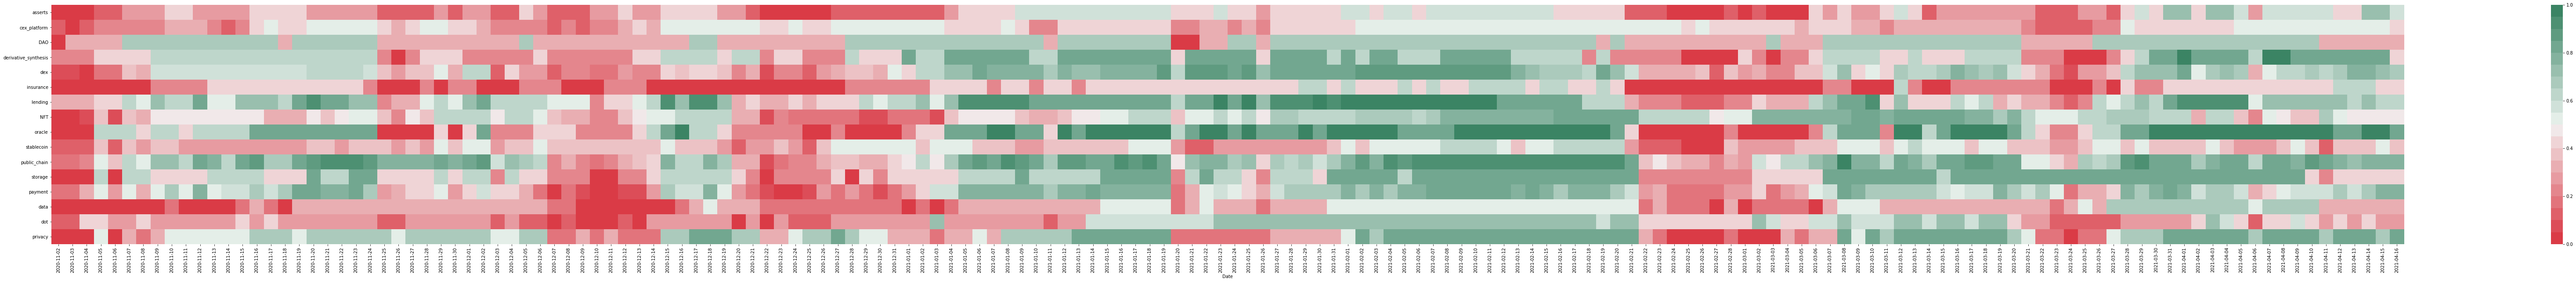

In [29]:
df = draw_heatmap_from_df(
    df=price_history_df,
    assets_group=ASSETS_GROUP,
    moving_avg=20)